Using cpu device


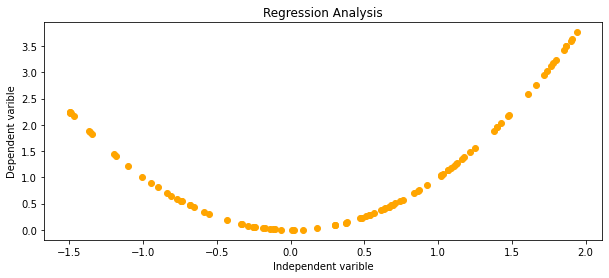

Net(
  (hidden): Linear(in_features=1, out_features=5, bias=True)
  (predict): Linear(in_features=5, out_features=1, bias=True)
)
Epoch: 1
Epoch: 101
Epoch: 201
Epoch: 301
rendering image


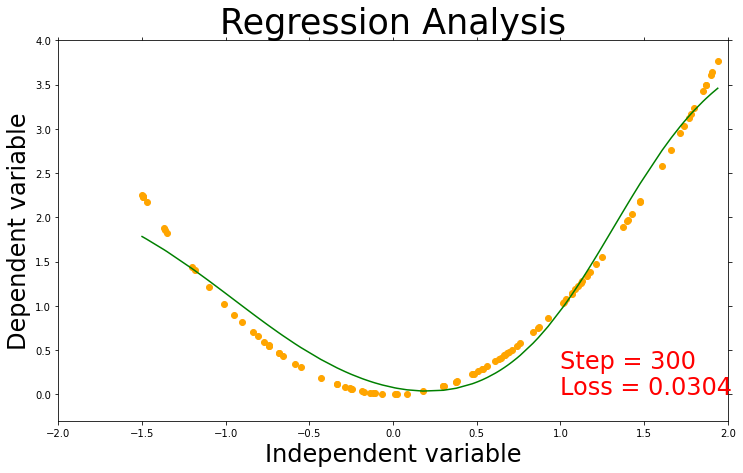

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio

# Get cpu or gpu device for training.
device = "cuda" if not torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# torch.manual_seed(1)    # reproducible

# x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
# y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

import pandas as pd

df_train = pd.read_csv('data/regression/square-simple-training.csv').set_index("Unnamed: 0")
df_test = pd.read_csv('data/regression/square-simple-test.csv').set_index("Unnamed: 0")
df_train_sorted = df_train.sort_values(by="x", ignore_index=True)
df_train_sorted.y += 130
df_train_sorted.y /= 90

x = torch.unsqueeze(torch.from_numpy(df_train_sorted.loc[:,"x"].values), dim=1)
y = torch.unsqueeze(torch.from_numpy(df_train_sorted.loc[:,"y"].values), dim=1)

# torch can only train on Variable, so convert them to Variable
x_1, y_1 = x,y
x, y = Variable(x).to(device), Variable(y).to(device)

# view data
plt.figure(figsize=(10,4))
plt.scatter(x_1.data.numpy(), y_1.data.numpy(), color = "orange")
plt.title('Regression Analysis')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()

# this is one way to define a network
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = torch.sigmoid(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=1, n_hidden=5, n_output=1).to(device)     # define the network
print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr=0.3)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

my_images = []
fig, ax = plt.subplots(figsize=(12,7))

# train the network
for t in range(301):
    if t % 100 == 0: 
        print(f"Epoch: {t+1}")
    prediction = net(x.float())     # input x and predict based on x

    loss = loss_func(prediction, y.float())     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    # plot and show learning process
    plt.cla()
    ax.set_title('Regression Analysis', fontsize=35)
    ax.set_xlabel('Independent variable', fontsize=24)
    ax.set_ylabel('Dependent variable', fontsize=24)
    ax.set_xlim(-2, 2)
    # ax.set_ylim(-150, 250)
    ax.set_ylim(-0.3, 4)
    ax.scatter(x_1.data.numpy(), y_1.data.numpy(), color = "orange")
    ax.plot(x_1.data.numpy(), prediction.cpu().data.numpy(), 'g')
    # ax.text(1.0, 40, 'Step = %d' % t, fontdict={'size': 24, 'color':  'red'})
    ax.text(1.0, 0.3, 'Step = %d' % t, fontdict={'size': 24, 'color':  'red'})
    ax.text(1.0, 0, 'Loss = %.4f' % loss.cpu().data.numpy(),
            fontdict={'size': 24, 'color':  'red'})

    # Used to return the plot as an image array 
    # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    my_images.append(image)
    
print("rendering image")
# save images as a gif    
imageio.mimsave('./curve_square_simple.gif', my_images, fps=20)

In [67]:
# for 1 neuron /15
for name, param in net.named_parameters():
    print(name, param)

hidden.weight Parameter containing:
tensor([[7.0862]], device='cuda:0', requires_grad=True)
hidden.bias Parameter containing:
tensor([-10.0380], device='cuda:0', requires_grad=True)
predict.weight Parameter containing:
tensor([[16.5117]], device='cuda:0', requires_grad=True)
predict.bias Parameter containing:
tensor([3.6772], device='cuda:0', requires_grad=True)


In [65]:
# for 1 neuron
for name, param in net.named_parameters():
    print(name, param)

hidden.weight Parameter containing:
tensor([[-3.7342]], device='cuda:0', requires_grad=True)
hidden.bias Parameter containing:
tensor([5.7463], device='cuda:0', requires_grad=True)
predict.weight Parameter containing:
tensor([[-3.7321]], device='cuda:0', requires_grad=True)
predict.bias Parameter containing:
tensor([4.2793], device='cuda:0', requires_grad=True)


In [63]:
# for / 15
for name, param in net.named_parameters():
    print(name, param)

hidden.weight Parameter containing:
tensor([[-5.4918],
        [ 7.5121],
        [ 4.6376],
        [-6.5139],
        [-6.6778]], device='cuda:0', requires_grad=True)
hidden.bias Parameter containing:
tensor([ -5.9277, -12.7983,  -7.7843,   7.7881,   4.7713], device='cuda:0',
       requires_grad=True)
predict.weight Parameter containing:
tensor([[12.8101,  8.5036,  3.8743, -6.0864, -4.6646]], device='cuda:0',
       requires_grad=True)
predict.bias Parameter containing:
tensor([1.9467], device='cuda:0', requires_grad=True)


In [59]:
# for / 45
for name, param in net.named_parameters():
    print(name, param)

hidden.weight Parameter containing:
tensor([[-2.5102],
        [-1.1880],
        [-3.4260],
        [-1.5387],
        [-2.7580]], device='cuda:0', requires_grad=True)
hidden.bias Parameter containing:
tensor([-3.2700, -1.9671,  4.1773, -2.4375, -3.4929], device='cuda:0',
       requires_grad=True)
predict.weight Parameter containing:
tensor([[ 2.6204,  0.8695, -7.9476,  1.6612,  2.8590]], device='cuda:0',
       requires_grad=True)
predict.bias Parameter containing:
tensor([4.8520], device='cuda:0', requires_grad=True)


In [57]:
# for -40 / 45
for name, param in net.named_parameters():
    print(name, param)

hidden.weight Parameter containing:
tensor([[ 3.4373],
        [-0.4054],
        [-2.2354],
        [-2.8460],
        [-2.7748]], device='cuda:0', requires_grad=True)
hidden.bias Parameter containing:
tensor([-5.5674,  1.0083, -2.5838,  1.9817, -3.3198], device='cuda:0',
       requires_grad=True)
predict.weight Parameter containing:
tensor([[ 7.1459,  0.4175,  3.1925, -2.7881,  4.0516]], device='cuda:0',
       requires_grad=True)
predict.bias Parameter containing:
tensor([-0.2608], device='cuda:0', requires_grad=True)


In [55]:
# for -40
for name, param in net.named_parameters():
    print(name, param)

hidden.weight Parameter containing:
tensor([[-2.4786],
        [-1.6997],
        [-0.3332],
        [ 2.4761],
        [ 0.3719]], device='cuda:0', requires_grad=True)
hidden.bias Parameter containing:
tensor([-2.7547,  1.7899,  0.2022, -3.8843, -0.5026], device='cuda:0',
       requires_grad=True)
predict.weight Parameter containing:
tensor([[ 3.4670, -1.5246,  0.1273,  4.1321, -0.4964]], device='cuda:0',
       requires_grad=True)
predict.bias Parameter containing:
tensor([0.1319], device='cuda:0', requires_grad=True)


In [51]:
# for -130
for name, param in net.named_parameters():
    print(name, param)

hidden.weight Parameter containing:
tensor([[-2.4174],
        [ 0.3105],
        [ 2.3724],
        [ 2.0492],
        [ 0.4276]], device='cuda:0', requires_grad=True)
hidden.bias Parameter containing:
tensor([-2.7076, -0.4962, -3.7693, -2.5971, -0.8664], device='cuda:0',
       requires_grad=True)
predict.weight Parameter containing:
tensor([[ 3.3523, -0.4269,  3.5386,  2.1332, -0.4753]], device='cuda:0',
       requires_grad=True)
predict.bias Parameter containing:
tensor([-0.1319], device='cuda:0', requires_grad=True)


In [41]:
# exctract weights from net neural network model
print(f"Weights: {net.predict.weight.cpu().data.numpy()}")
print(f"Weights: {net.hidden.weight.cpu().data.numpy()}")

Weights: [[ 3.1242392  1.4385802  0.6836778  1.604053  -3.887238 ]]
Weights: [[-2.3863964 ]
 [-0.13148136]
 [-0.18746163]
 [ 1.1680827 ]
 [-2.6681073 ]]


In [46]:
print(net)  # net architecture

Net(
  (hidden): Linear(in_features=1, out_features=5, bias=True)
  (predict): Linear(in_features=5, out_features=1, bias=True)
)


In [48]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[-1.4134],
        [-1.6186],
        [-0.5983],
        [-0.5967],
        [ 3.2039]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-1.0048, -0.9928,  0.4729, -0.2577, -3.9883], device='cuda:0',
       requires_grad=True)
Parameter containing:
tensor([[ 1.2025,  1.4929, -0.1840,  0.2338,  4.3160]], device='cuda:0',
       requires_grad=True)
Parameter containing:
tensor([-0.5979], device='cuda:0', requires_grad=True)


In [49]:
for name, param in net.named_parameters():
    print(name, param)

hidden.weight Parameter containing:
tensor([[-1.4134],
        [-1.6186],
        [-0.5983],
        [-0.5967],
        [ 3.2039]], device='cuda:0', requires_grad=True)
hidden.bias Parameter containing:
tensor([-1.0048, -0.9928,  0.4729, -0.2577, -3.9883], device='cuda:0',
       requires_grad=True)
predict.weight Parameter containing:
tensor([[ 1.2025,  1.4929, -0.1840,  0.2338,  4.3160]], device='cuda:0',
       requires_grad=True)
predict.bias Parameter containing:
tensor([-0.5979], device='cuda:0', requires_grad=True)


In [10]:
df_train.y.mean()

-30.558883544400913

In [12]:
df_train.y.std()

96.26022773952369

In [22]:
df_train_sorted.head()

,x,y
0,-1.499164,202.274306
1,-1.495167,201.197205
2,-1.494503,201.018546
3,-1.492045,200.357743
4,-1.472403,195.117463


In [23]:
df_train_sorted.tail()

,x,y
95,1.868996,314.383154
96,1.869128,314.427569
97,1.898383,324.347268
98,1.907390,327.432191
99,1.939860,338.675181


In [26]:
df_train_sorted.iloc[30:40]

,x,y
30,-0.251473,5.691480
31,-0.243401,5.331961
32,-0.185785,3.106450
33,-0.171543,2.648420
34,-0.138692,1.731202
35,-0.117594,1.244559
36,-0.105301,0.997948
37,-0.062777,0.354686
38,0.011129,0.011148
39,0.025201,0.057156


In [25]:
df_train_sorted.y -= 130

In [32]:
df_train_sorted.y/df_train_sorted.x**2

0     90.0
1     90.0
2     90.0
3     90.0
4     90.0
      ... 
95    90.0
96    90.0
97    90.0
98    90.0
99    90.0
Length: 100, dtype: float64

In [30]:
df_train_sorted.y

0     202.274306
1     201.197205
2     201.018546
3     200.357743
4     195.117463
         ...    
95    314.383154
96    314.427569
97    324.347268
98    327.432191
99    338.675181
Name: y, Length: 100, dtype: float64

In [33]:
df_train_sorted.x ** 2 * 90

0     202.274306
1     201.197205
2     201.018546
3     200.357743
4     195.117463
         ...    
95    314.383154
96    314.427569
97    324.347268
98    327.432191
99    338.675181
Name: x, Length: 100, dtype: float64